<b>My Vivino</b>

<b>Part I</b> 

First, I search for Vivino dataset, and found these 4 csv files on Kaggle. (URL: https://www.kaggle.com/budnyak/wine-rating-and-price)
These csv files contain scrapped data from Vivino website for each winestyle: red, white, rose and sparkling.

In the cell below, I loades each csv file into pandas dataframe for convinience.

In [4]:
import pandas as pd

red_df = pd.read_csv('red.csv')
rose_df = pd.read_csv('rose.csv')
sparkling_df = pd.read_csv('Sparkling.csv')
white_df = pd.read_csv('white.csv')

<b>Part II. Data Exploration</b>

Each dataframe has 8 columns: Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year.
The cells below output general information about each winestyle such as average price, most famous country, etc.

In [27]:
dfs = [red_df, rose_df, sparkling_df, white_df]

table = [[round(dfs[i]['Price'].mean(),2), 
        list(dfs[i]['Country'].mode())[0], 
        len(dfs[i]), 
        str(round(dfs[i]['Price'].min(),2)) + " ~ " + str(round(dfs[i]['Price'].max(),2)),
        dfs[i]['Year'].min(),
        str(dfs[i]['Rating'].min()) + " ~ " + str(dfs[i]['Rating'].max()),
        sum(dfs[i]['NumberOfRatings'])] for i in range(len(dfs))]

df = pd.DataFrame.from_records(table, columns=['Average Price', 'Famous Country', 'NumOfBottles', 'Price Range', 
        'Oldest year', 'Rating Range', 'Total Num of Ratings'], index = ['Red', 'Rose', 'Sparkling', 'White'])

print(df)

           Average Price Famous Country  NumOfBottles     Price Range  \
Red                39.15          Italy          8666  3.55 ~ 3410.79   
Rose               12.53         France           397    3.67 ~ 249.0   
Sparkling          34.80         France          1007    3.15 ~ 495.0   
White              20.62        Germany          3764   3.74 ~ 681.37   

          Oldest year Rating Range  Total Num of Ratings  
Red              1988    2.5 ~ 4.8               3598881  
Rose             2012    2.7 ~ 4.8                103906  
Sparkling        1961    3.2 ~ 4.7               1516623  
White            1993    2.2 ~ 4.9                706003  


<b>Part III. Data Visualization</b>


<AxesSubplot:title={'center':'Rating'}, xlabel='[Wine]'>

<Figure size 432x288 with 0 Axes>

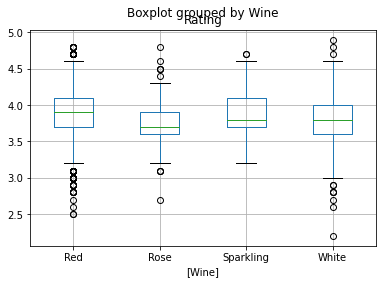

In [30]:
import matplotlib.pyplot as plt

# box plot of Ratings of Wines
redRating = pd.DataFrame(red_df['Rating'])
redRating['Wine'] = "Red"

roseRating = pd.DataFrame(rose_df['Rating'])
roseRating['Wine'] = "Rose"

sparklingRating = pd.DataFrame(sparkling_df['Rating'])
sparklingRating['Wine'] = "Sparkling"

whiteRating = pd.DataFrame(white_df['Rating'])
whiteRating['Wine'] = "White"
allRatings = pd.concat([redRating, roseRating, sparklingRating, whiteRating])

plt.figure()
allRatings.boxplot(by="Wine")


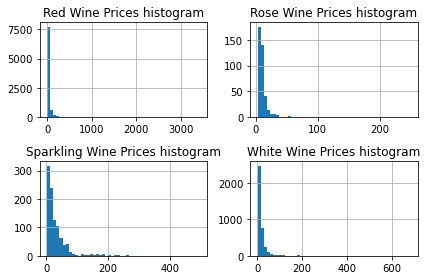

In [44]:
#Histogram of prices

fig = plt.figure()
titles = ['Red', 'Rose', 'Sparkling', 'White']

for i in range(1,5):
    plt.subplot(2,2,i)
    plt.hist(dfs[i-1]['Price'], 50, rwidth=2.0, align='mid')
    plt.grid()
    plt.title(titles[i-1] + " Wine Prices histogram")
    
fig.tight_layout()
plt.show()

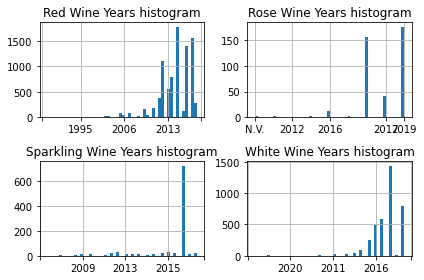

In [59]:
# Histogram by Years

fig = plt.figure()
titles = ['Red', 'Rose', 'Sparkling', 'White']

for i in range(1,5):
    plt.subplot(2,2,i)
    plt.hist(dfs[i-1]['Year'], 50, rwidth=2.0, align='mid')
    plt.grid()

    ax = plt.gca()
    xmin, xmax = ax.get_xlim()
    custom_ticks = np.linspace(xmin, xmax, 5, dtype=int)
    ax.set_xticks(custom_ticks)

    plt.gca().invert_xaxis()

    plt.title(titles[i-1] + " Wine Years histogram")
    
fig.tight_layout()
plt.show()

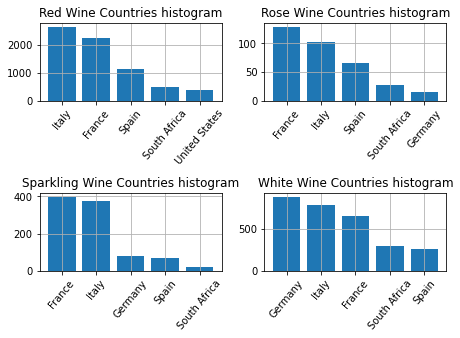

In [93]:
# histogram by countries
fig = plt.figure()
titles = ['Red', 'Rose', 'Sparkling', 'White']

for i in range(1,5):
    plt.subplot(2,2,i)
    r = dfs[i-1].groupby(['Country'])['Rating'].count().reset_index(name='Count').sort_values(['Count'], ascending=False).head()
    plt.bar(r['Country'], r['Count'])
    plt.xticks(rotation=50)
    plt.grid()
    plt.title(titles[i-1] + " Wine Countries histogram")
    
fig.tight_layout()
plt.show()

<b>Part IV. Machine Learning</b>

We will try to predict price of wine considering other attributes. You can see resudual plot and corresponding R^2 score below

In [98]:
red_df['Type'] = 'Red'
rose_df['Type'] = 'Rose'
sparkling_df['Type'] = 'Sparkling'
white_df['Type'] = 'White'

wines_df = pd.concat([red_df, rose_df, sparkling_df, white_df])
wines_df

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,Red
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,Red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,Red
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,Red
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,Red
...,...,...,...,...,...,...,...,...,...
3759,Sauvignon Blanc 2019,New Zealand,Marlborough,Oyster Bay,4.0,4423,10.66,2019,White
3760,Vinho Verde Sweet N.V.,Portugal,Vinho Verde,Casal Garcia,4.0,4609,5.05,N.V.,White
3761,Sauvignon Blanc 2018,New Zealand,Marlborough,Kim Crawford,3.9,5105,14.90,2018,White
3762,Sauvignon Blanc 2019,New Zealand,Marlborough,Hans Greyl,4.2,5817,7.75,2019,White


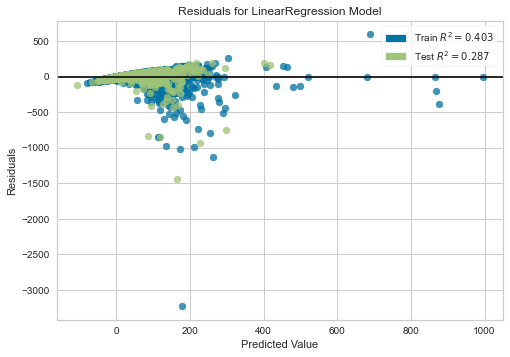

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

X = wines_df[['Country', 'Region', 'Rating', 'NumberOfRatings', 'Year', 'Type']]
X = pd.get_dummies(data=X, drop_first=True)
y = wines_df['Price']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1)


model_name = 'Linear Regression'
model = LinearRegression()

visualizer = ResidualsPlot(model, hist=False)

visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.show()  